# Import Libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
from pandas_visual_analysis import VisualAnalysis

# Import Datasets

In [3]:
Data = pd.read_csv("kolkata_hrdata.csv")

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19503 entries, 0 to 19502
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        19503 non-null  object 
 1   Datetime    19503 non-null  object 
 2   PM2.5       18061 non-null  float64
 3   PM10        18071 non-null  float64
 4   NO          18738 non-null  float64
 5   NO2         18795 non-null  float64
 6   NOx         19386 non-null  float64
 7   NH3         19427 non-null  float64
 8   CO          19480 non-null  float64
 9   SO2         17907 non-null  float64
 10  O3          18161 non-null  float64
 11  Benzene     19444 non-null  float64
 12  Toluene     19438 non-null  float64
 13  Xylene      9352 non-null   float64
 14  AQI         18066 non-null  float64
 15  AQI_Bucket  18066 non-null  object 
dtypes: float64(13), object(3)
memory usage: 2.4+ MB


In [4]:
Data.shape

(19503, 16)

In [5]:
Data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,18061.000000,18071.000000,18738.000000,18795.000000,19386.000000,19427.000000,19480.000000,17907.000000,18161.000000,19444.000000,19438.000000,9352.000000,18066.000000
mean,64.748260,116.229831,26.693920,40.515746,63.149616,18.414637,0.799987,8.267030,30.633001,10.894834,15.430997,2.562476,140.688918
std,65.500429,102.897223,59.788837,35.713272,74.270205,14.734444,0.683440,8.024314,27.004158,12.987519,16.926408,2.675697,105.288187
min,0.020000,0.750000,0.020000,0.160000,0.000000,0.010000,0.000000,0.070000,0.020000,0.000000,0.000000,0.000000,23.000000
25%,20.740000,42.280000,3.500000,16.020000,20.472500,9.010000,0.390000,2.700000,10.870000,1.830000,6.070000,0.880000,60.000000
50%,42.840000,78.990000,5.400000,28.960000,35.540000,13.650000,0.570000,5.880000,22.020000,5.160000,9.650000,1.890000,94.000000
75%,86.400000,162.280000,13.140000,52.590000,67.805000,25.005000,1.060000,11.125000,40.670000,17.172500,17.867500,3.220000,208.000000
max,871.240000,999.990000,498.970000,324.410000,494.730000,439.050000,6.270000,131.190000,170.420000,327.570000,250.330000,39.500000,500.000000


In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19503 entries, 0 to 19502
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        19503 non-null  object 
 1   Datetime    19503 non-null  object 
 2   PM2.5       18061 non-null  float64
 3   PM10        18071 non-null  float64
 4   NO          18738 non-null  float64
 5   NO2         18795 non-null  float64
 6   NOx         19386 non-null  float64
 7   NH3         19427 non-null  float64
 8   CO          19480 non-null  float64
 9   SO2         17907 non-null  float64
 10  O3          18161 non-null  float64
 11  Benzene     19444 non-null  float64
 12  Toluene     19438 non-null  float64
 13  Xylene      9352 non-null   float64
 14  AQI         18066 non-null  float64
 15  AQI_Bucket  18066 non-null  object 
dtypes: float64(13), object(3)
memory usage: 2.4+ MB


# Data Preprocessing


In [7]:
Data.columns

Index(['City', 'Datetime', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO',
       'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [32]:
#Rename Columns
Data = Data.rename(columns ={' pm25':'pm2.5',
                    ' pm10':'pm10',
                    ' o3':'o3',
                    ' no2':'no2',
                    ' so2':'so2',
                    ' co':'co'})
Data.columns

Index(['date', 'pm2.5', 'pm10', 'o3', 'no2', 'so2', 'co'], dtype='object')

In [33]:
#Convert Date from String to Datetime
Data['date'] = pd.to_datetime(Data.date)

In [11]:
#Sort Dataframe acoording to Dates
Data = Data.sort_values(by='Datetime')
Data['Datetime']

0        2018-04-10 10:00:00
1        2018-04-10 11:00:00
2        2018-04-10 12:00:00
3        2018-04-10 13:00:00
4        2018-04-10 14:00:00
                ...         
19498    2020-06-30 20:00:00
19499    2020-06-30 21:00:00
19500    2020-06-30 22:00:00
19501    2020-06-30 23:00:00
19502    2020-07-01 00:00:00
Name: Datetime, Length: 19503, dtype: object

In [37]:
#Replace Blank String values with 0
Data.replace(' ','0',inplace = True)

In [38]:
#Checking if there is any null values
Data.isnull().sum()

City             0
Datetime         0
AQI           1437
AQI_Bucket    1437
dtype: int64

In [10]:
Data.dtypes

City           object
Datetime       object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [47]:
Data = Data.drop('AQI_Bucket', axis=1)

In [48]:
Data.tail(60)

,Datetime,AQI
19443,2020-06-28 13:00:00,46.0
19444,2020-06-28 14:00:00,47.0
19445,2020-06-28 15:00:00,48.0
19446,2020-06-28 16:00:00,48.0
19447,2020-06-28 17:00:00,48.0
19448,2020-06-28 18:00:00,50.0
19449,2020-06-28 19:00:00,50.0
19450,2020-06-28 20:00:00,50.0
19451,2020-06-28 21:00:00,49.0
19452,2020-06-28 22:00:00,49.0


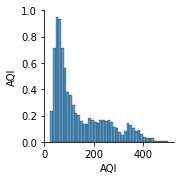

In [49]:
sns.pairplot(Data)

In [50]:
ta.describe()

,AQI
count,18066.000000
mean,140.688918
std,105.288187
min,23.000000
25%,60.000000
50%,94.000000
75%,208.000000
max,500.000000


## Data sets are now cleaned. Hence it is ready to use

In [36]:
Data.head(50)  #DataSets are Sorted and Ready

,date,pm2.5,pm10,o3,no2,so2,co
791,2020-01-30,0,67,49,13,7,4
727,2020-01-31,146,63,61,15,9,4
728,2020-02-01,121,74,59,19,9,6
729,2020-02-02,137,72,54,16,7,4
730,2020-02-03,130,82,70,19,10,5
731,2020-02-04,143,103,75,23,21,6
732,2020-02-05,168,84,5,15,7,6
733,2020-02-06,154,91,9,20,7,5
734,2020-02-07,160,0,0,0,0,0
792,2020-02-09,0,90,38,24,10,12


In [38]:
Data['no2']

791    13
727    15
728    19
729    16
730    19
       ..
11      3
12      3
13      4
14      3
15      0
Name: no2, Length: 794, dtype: int64

In [37]:
#Converting all values from String to Integer Datatype except Date

Data['pm2.5']=[int(i) for i in Data['pm2.5']]
Data['pm10']=[int(i) for i in Data['pm10']]
Data['o3']=[int(i) for i in Data['o3']]
Data['no2']=[int(i) for i in Data['no2']]
Data['so2']=[int(i) for i in Data['so2']]
Data['co']=[int(i) for i in Data['co']]

In [39]:
Data.head(50)

,date,pm2.5,pm10,o3,no2,so2,co
791,2020-01-30,0,67,49,13,7,4
727,2020-01-31,146,63,61,15,9,4
728,2020-02-01,121,74,59,19,9,6
729,2020-02-02,137,72,54,16,7,4
730,2020-02-03,130,82,70,19,10,5
731,2020-02-04,143,103,75,23,21,6
732,2020-02-05,168,84,5,15,7,6
733,2020-02-06,154,91,9,20,7,5
734,2020-02-07,160,0,0,0,0,0
792,2020-02-09,0,90,38,24,10,12
